In [64]:
from smr import File
import numpy as np
from matplotlib import pyplot as plt
from kaveh.plots import axvlines


In [65]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'


In [67]:
smr_content = File(f_name)
smr_content.read_channels()


Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [68]:
voltage_chan = smr_content.get_channel(0)
# HE_chan = smr_content.get_channel(1)
# VE_chan = smr_content.get_channel(2)

In [71]:
%%time
from kaveh.sorting.spikesorter import SimpleSpikeSorter

# Time range of data to process:
t_0 = 0 #s
t_end = 20 #s

idx_0 = int(np.round(t_0 / voltage_chan.dt))
idx_end = int(np.round(t_end / voltage_chan.dt))
prange = slice(idx_0, idx_end)
sss = SimpleSpikeSorter(voltage_chan.data[prange], voltage_chan.dt)
sss.run()


CPU times: user 11.4 s, sys: 5.16 s, total: 16.5 s
Wall time: 10.5 s


<IPython.core.display.Javascript object>


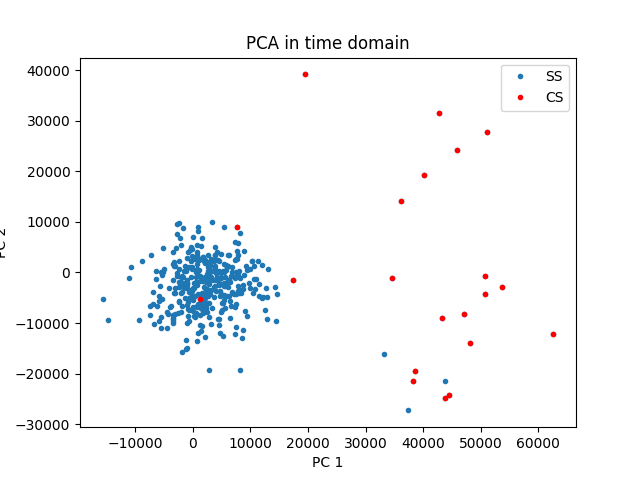

<IPython.core.display.Javascript object>


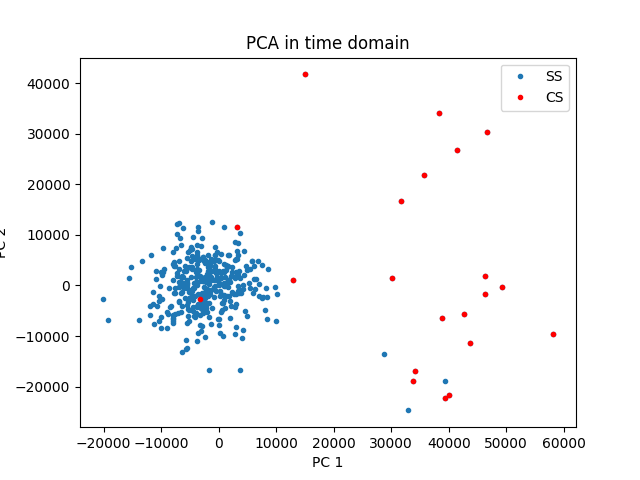

In [84]:
# PCA
from sklearn.decomposition import PCA
from kaveh.toolbox import closest_argmin

pca = PCA(n_components=2)
pca.fit(sss.aligned_spikes - np.mean(sss.aligned_spikes, axis=0))

x_pca = pca.transform(sss.aligned_spikes)
csi = sss.get_cs_spike_indices()
ssi = sss.get_spike_indices()

cs = closest_argmin(csi, ssi)
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in time domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

# PCA
from sklearn.decomposition import PCA
from kaveh.toolbox import closest_argmin

pca = PCA(n_components=2)
pca.fit(sss.aligned_spikes )

x_pca = pca.transform(sss.aligned_spikes)
csi = sss.get_cs_spike_indices()
ssi = sss.get_spike_indices()

cs = closest_argmin(csi, ssi)
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in time domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

<IPython.core.display.Javascript object>


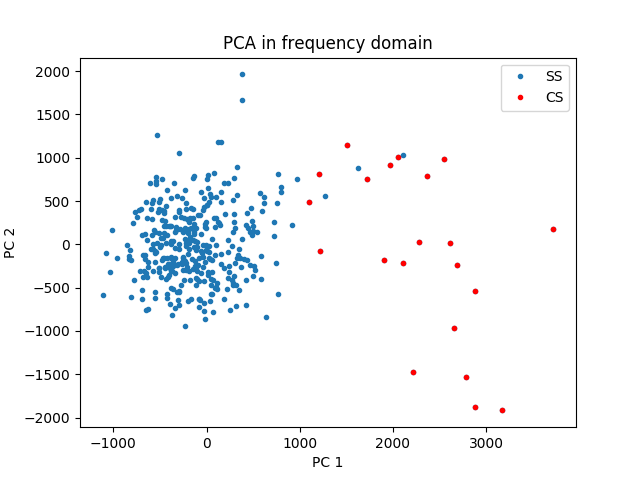

In [80]:
_, fft_power = sss._find_max_powers()

pca = PCA(n_components=2)
pca.fit(fft_power)

x_pca = pca.transform(fft_power)
csi = sss.get_cs_spike_indices()
ssi = sss.get_spike_indices()

cs = closest_argmin(csi, ssi)
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in frequency domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

(382, 28)